# load library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA

plt.rcParams['font.family'] = 'Malgun Gothic'

# load data

In [9]:
combined_df = pd.read_csv('preprocessed data/combined_df.csv', index_col=0)

In [10]:
combined_df

,RESPOND_ID,EXAMIN_BEGIN_DE,SEX,AGE,AREA,INCOME,SEOUL,GYEONGGI,BUSAN,CHUNGNAM,...,Shopping,Activity,Etc,City,District,Company,Per_Diem,Married,Children,Occupation
0,53364346,20240101,F,50대,서울특별시,700만원 이상,3,4,3,3,...,1만원 미만,1만원 미만,3~5만원 미만,경기도,이천시,2명,1박 2일,기혼,자녀 성인(막내 대학),사무/기술직
1,53363665,20240101,F,50대,서울특별시,300만원 미만,3,3,4,3,...,1만원 미만,1만원 미만,1만원 미만,강원도,홍천군,2명,1박 2일,기혼,자녀 성인(막내 대학),판매/서비스직
2,53322894,20240101,F,50대,서울특별시,700만원 이상,3,4,4,3,...,1만원 미만,1~3만원 미만,1만원 미만,경기도,남양주시,4명,1박 2일,기혼,자녀 성인(막내 대학),자영업
3,53349009,20240101,F,50대,서울특별시,700만원 이상,1,2,3,4,...,1만원 미만,1만원 미만,1만원 미만,제주도,구좌읍/대정읍/서귀포시(시내동)/성산읍/애월읍/제주시(시내동)/조천읍/표선면/한림읍,3명,4박 5일,기혼,자녀 성장(막내 중고생),전업주부
4,53340551,20240101,F,40대,경상남도,700만원 이상,3,3,3,3,...,10만원 이상,10만원 이상,1만원 미만,제주도,서귀포시(시내동)/애월읍/한림읍,3명,3박 4일,기혼,자녀 유아&성장(막내 입학전~초등생),사무/기술직
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,53366910,20241230,M,50대,전라남도,300만원 미만,2,2,2,2,...,1만원 미만,5~7만원 미만,10만원 이상,충청남도,부여군,5명 이상,1박 2일,미혼,미혼,사무/기술직
1569,53367792,20241230,F,50대,부산광역시,700만원 이상,3,3,3,4,...,1만원 미만,5~7만원 미만,1만원 미만,제주도,성산읍/애월읍/우도면/한림읍,4명,3박 4일,기혼,자녀 성인(막내 대학),기능/숙련/일반작업직
1570,53367863,20241230,F,40대,경기도,700만원 이상,1,2,4,2,...,1만원 미만,1만원 미만,1만원 미만,전라남도,순천시,5명 이상,2박 3일,기혼,자녀 유아&성장(막내 입학전~초등생),사무/기술직
1571,53369696,20241230,M,50대,서울특별시,700만원 이상,3,4,1,1,...,1만원 미만,1만원 미만,1만원 미만,충청북도,충주시(구 청원군 포함),4명,2박 3일,기혼,자녀 성인(막내 대학),사무/기술직


In [11]:
def groupby_df(df):
    # 고유 값 추출
    grouping_list_income = sorted(df['INCOME'].unique().astype(str))
    grouping_list_sex = sorted(df['SEX'].unique())
    grouping_list_age = sorted(df['AGE'].unique())

    # 그룹화
    grouped_income = df.groupby('INCOME')
    grouped_sex = df.groupby('SEX')
    grouped_age = df.groupby('AGE')

    # 각 그룹을 리스트로 저장
    grouped_income_list = [grouped_income.get_group(income) for income in grouping_list_income]
    grouped_sex_list = [grouped_sex.get_group(sex) for sex in grouping_list_sex]
    grouped_age_list = [grouped_age.get_group(age) for age in grouping_list_age]

    return grouped_income_list, grouped_sex_list, grouped_age_list

# 함수 호출
grouped_income, grouped_sex, grouped_age = groupby_df(combined_df)

# 각 그룹을 unpacking하여 변수에 저장
grouped_income1, grouped_income2 = grouped_income
grouped_sex1, grouped_sex2 = grouped_sex
grouped_age1, grouped_age2, grouped_age3, grouped_age4 = grouped_age


# Correlation Matrix

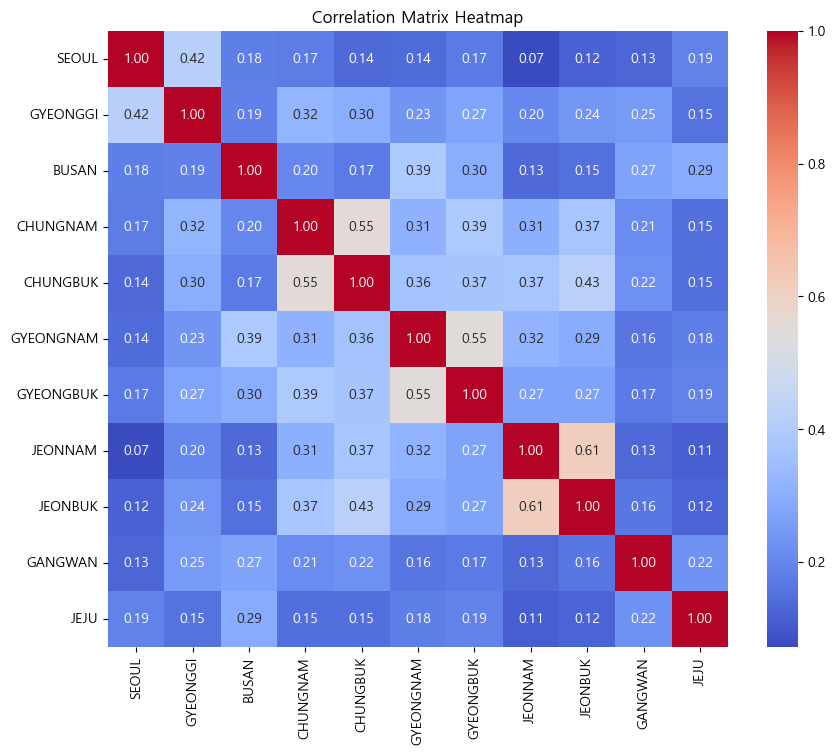

In [12]:
columns = ['SEOUL', 'GYEONGGI', 'BUSAN', 'CHUNGNAM', 'CHUNGBUK', 'GYEONGNAM', 'GYEONGBUK', 'JEONNAM', 'JEONBUK', 'GANGWAN', 'JEJU']
corr_matrix = combined_df[columns].corr()

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# 가까운 지역별로 상관계수 값이 높음.
# 하지만 가장 큰 상관계수 값도 0.7 이하로 강한 양의 상관관계를 보이는 지역은 없음.
# 지역 별 선호 값이 다른 지역과의 관계가 없음을 결론 내릴 수 있음.

# 각 지역별 boxplot

SEOUL에 관한 그래프


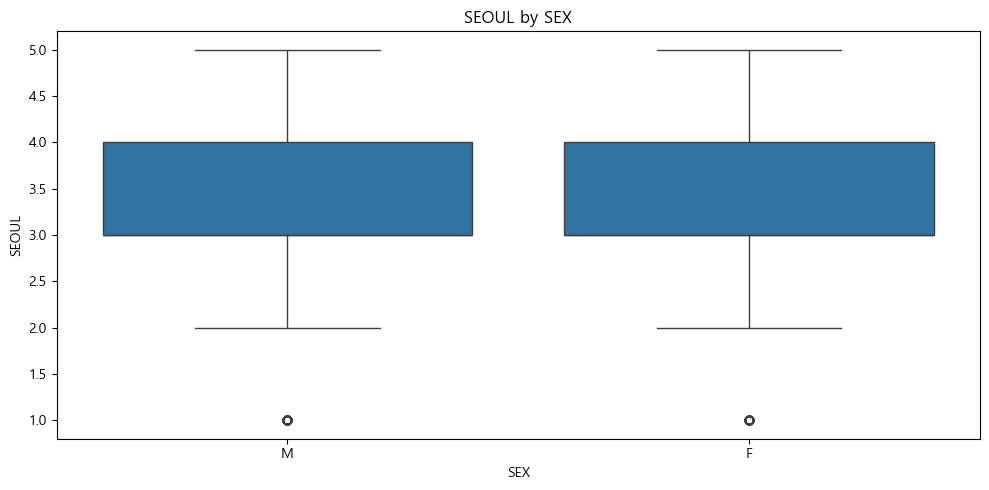


SEOUL에 관한 그래프


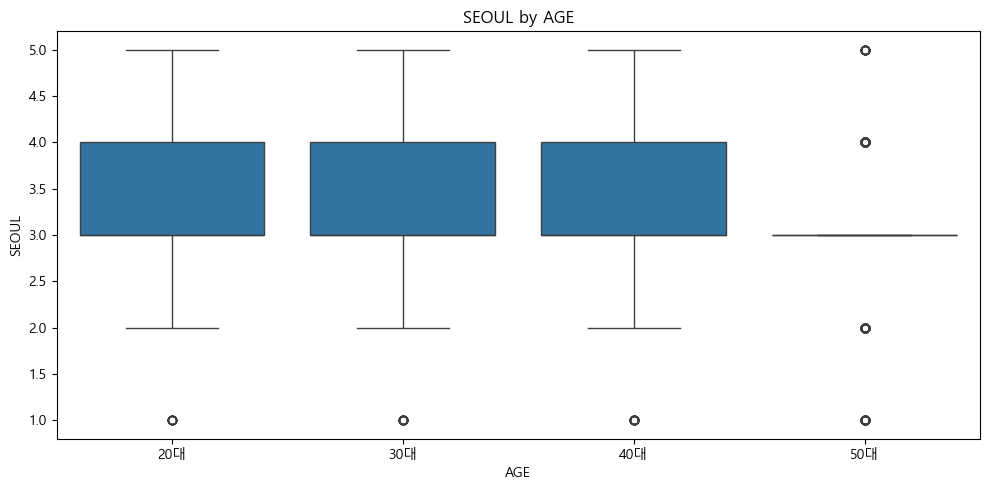


SEOUL에 관한 그래프


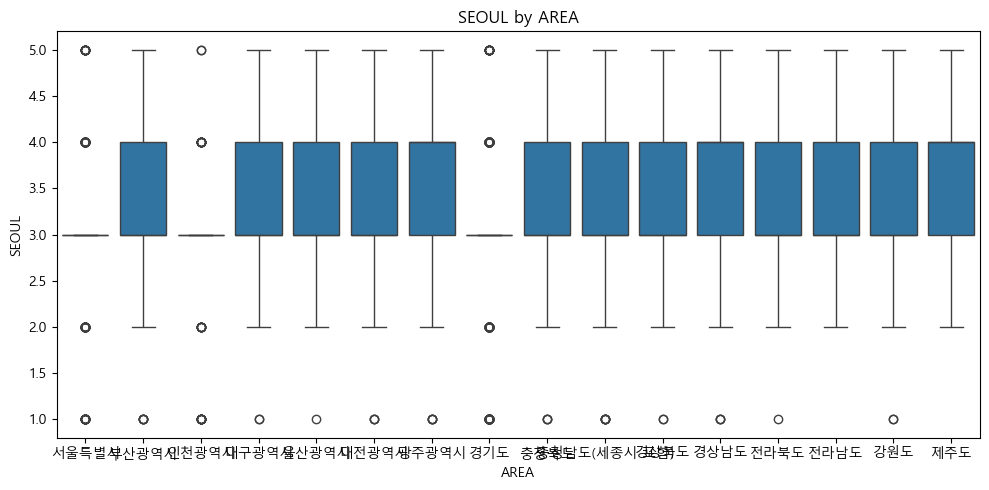


SEOUL에 관한 그래프


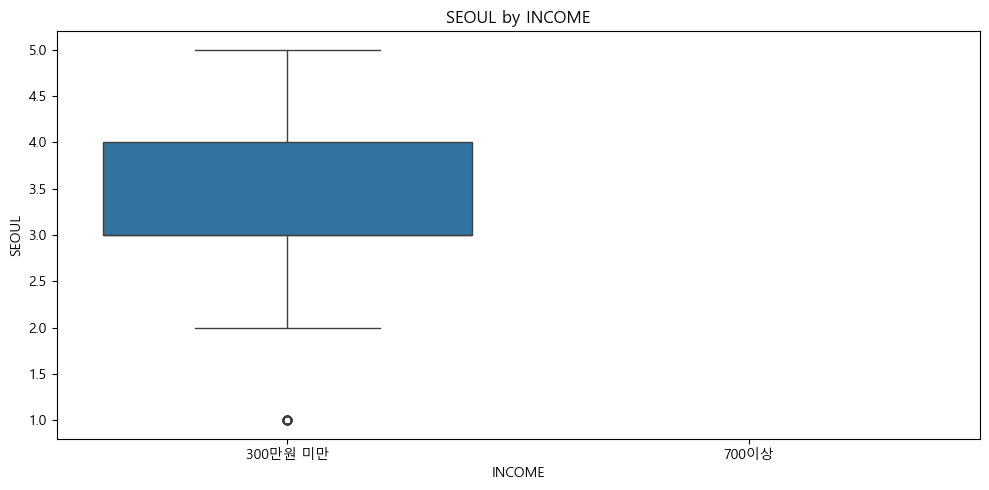


SEOUL에 관한 그래프


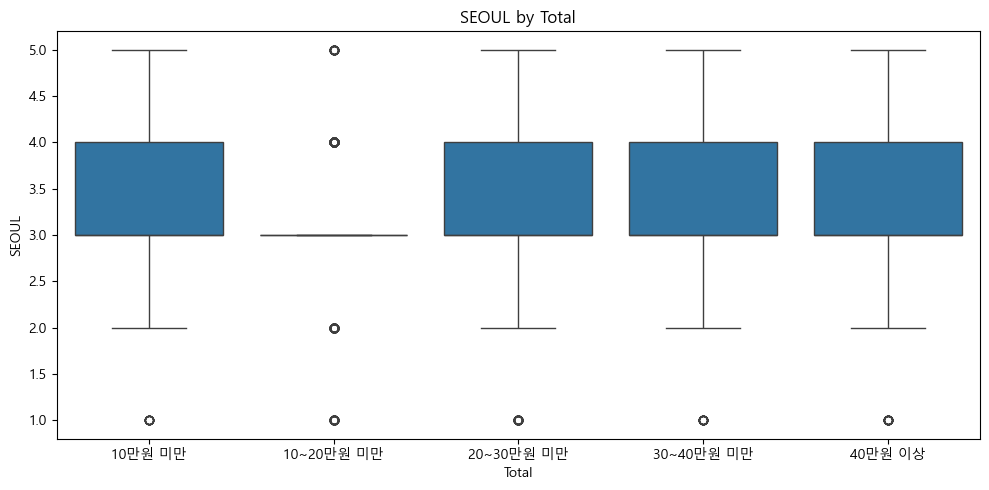


GYEONGGI에 관한 그래프


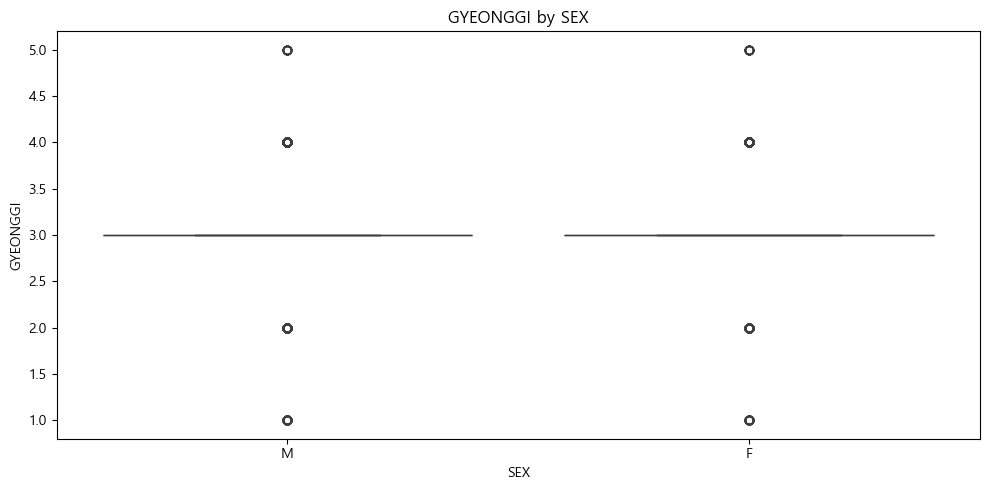


GYEONGGI에 관한 그래프


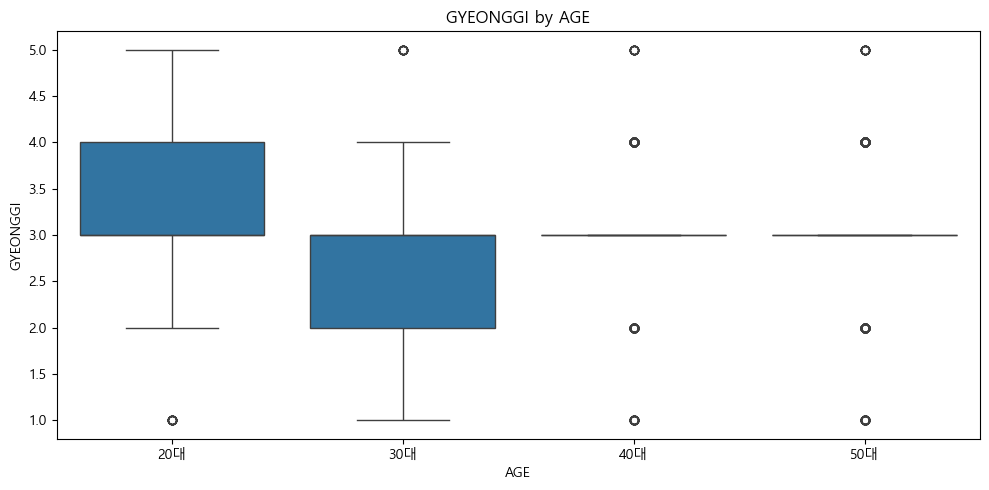


GYEONGGI에 관한 그래프


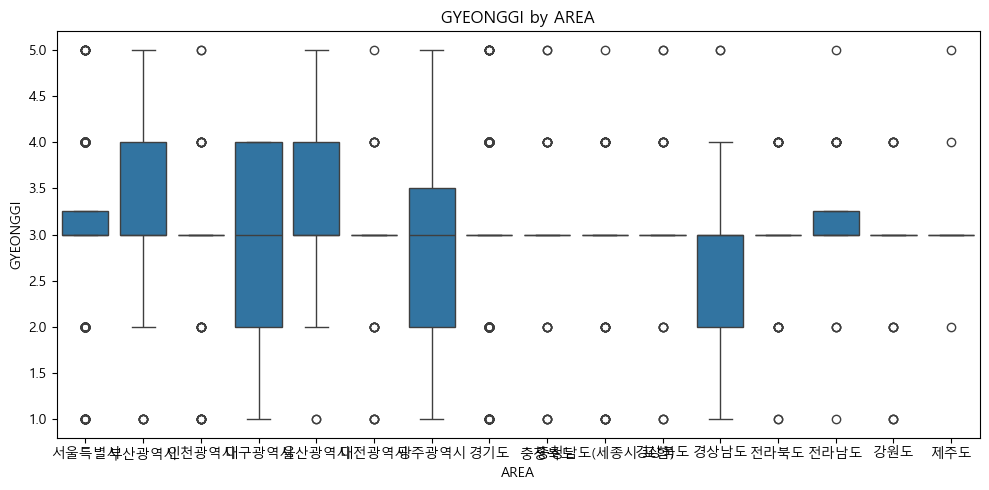


GYEONGGI에 관한 그래프


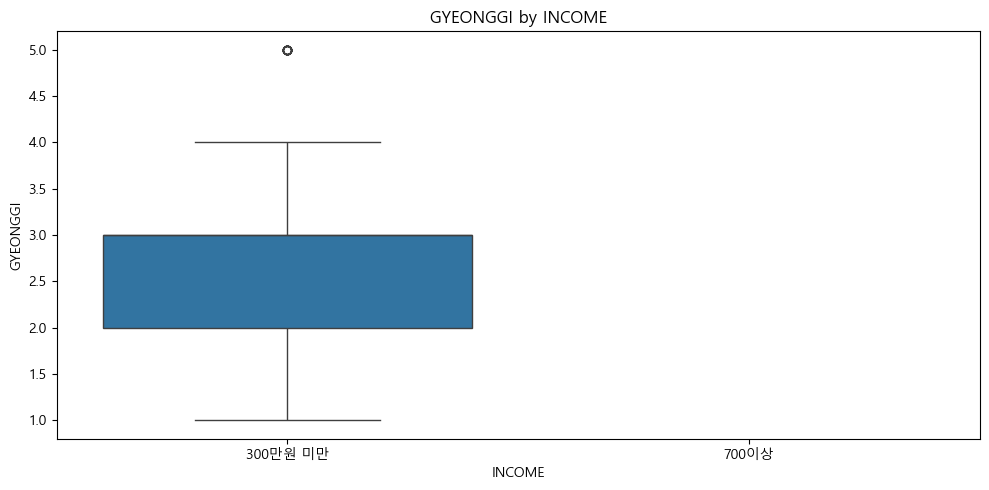


GYEONGGI에 관한 그래프


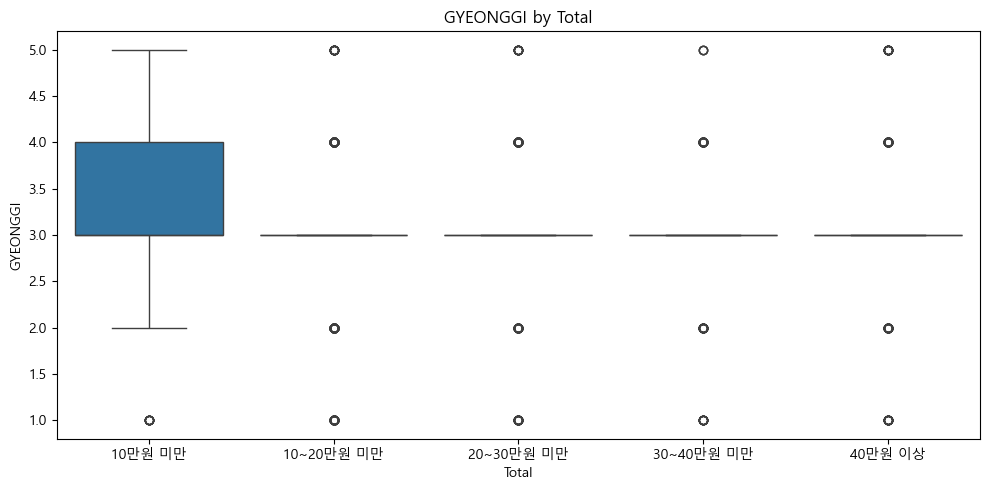


BUSAN에 관한 그래프


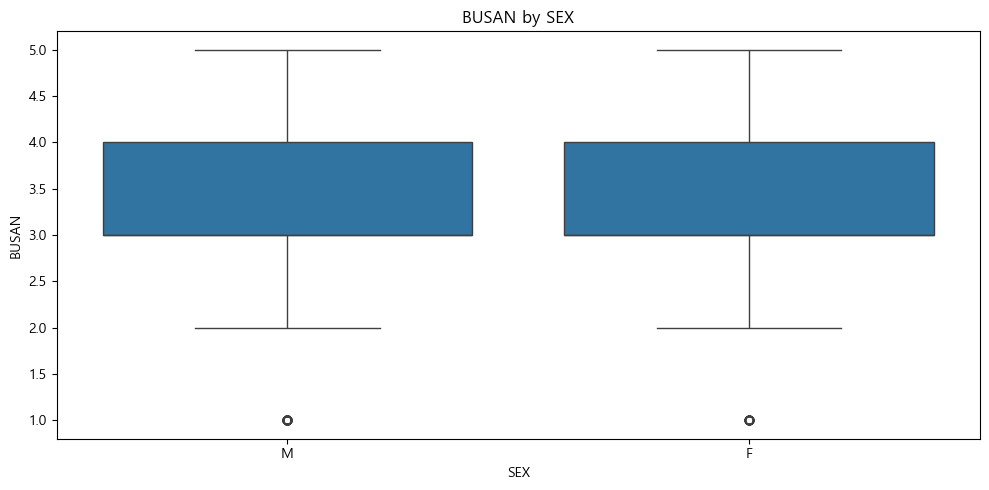


BUSAN에 관한 그래프


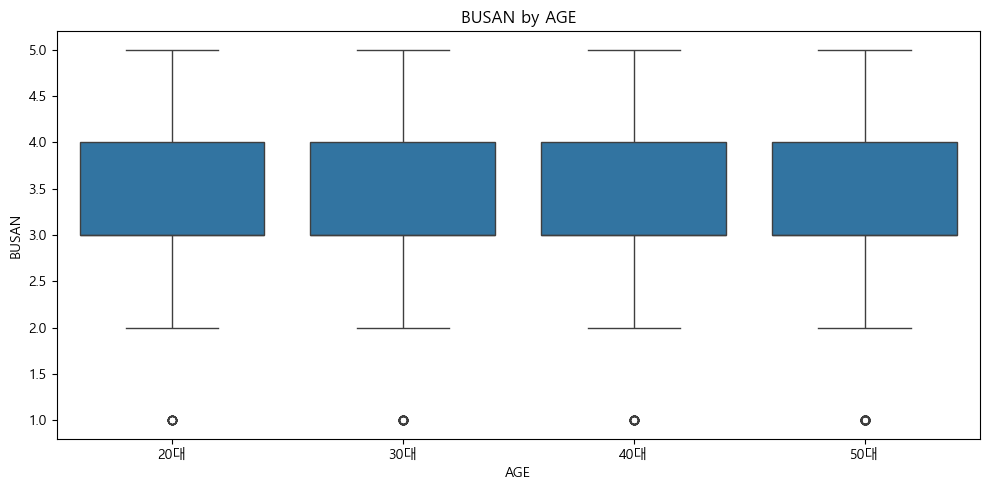


BUSAN에 관한 그래프


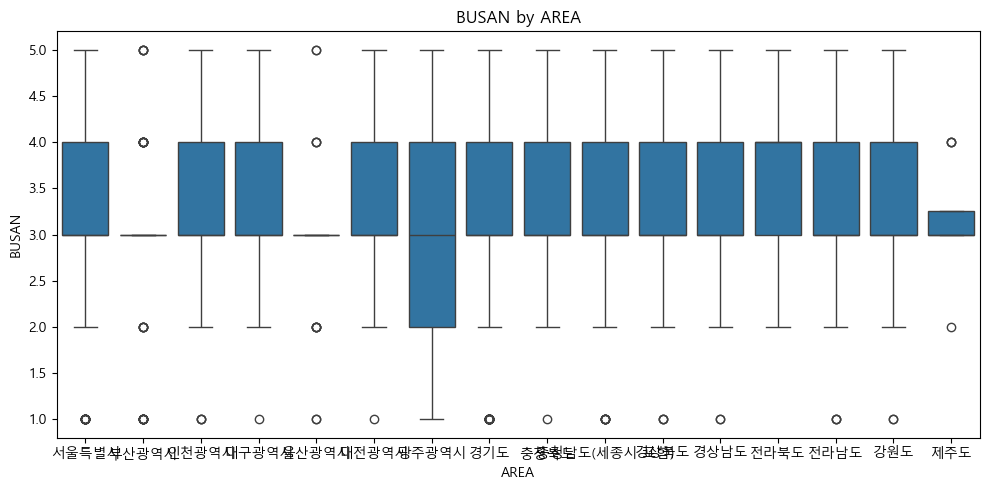


BUSAN에 관한 그래프


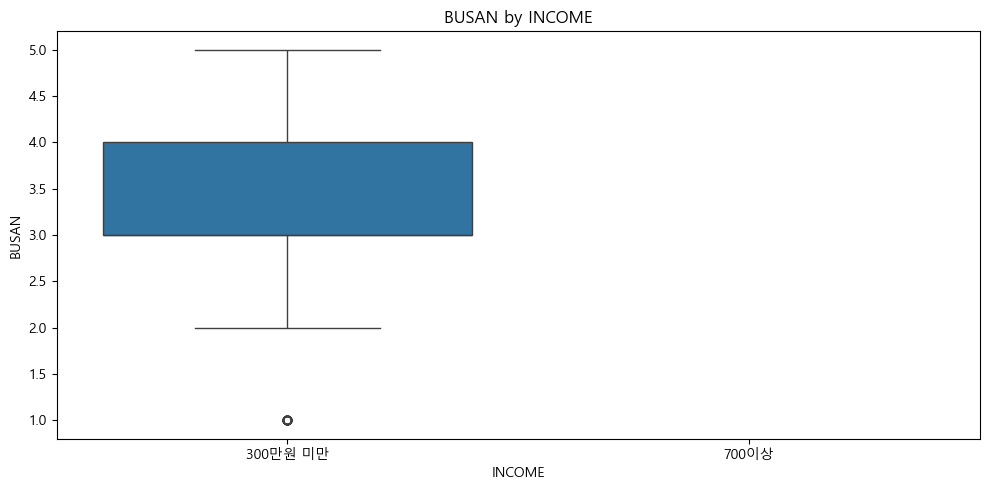


BUSAN에 관한 그래프


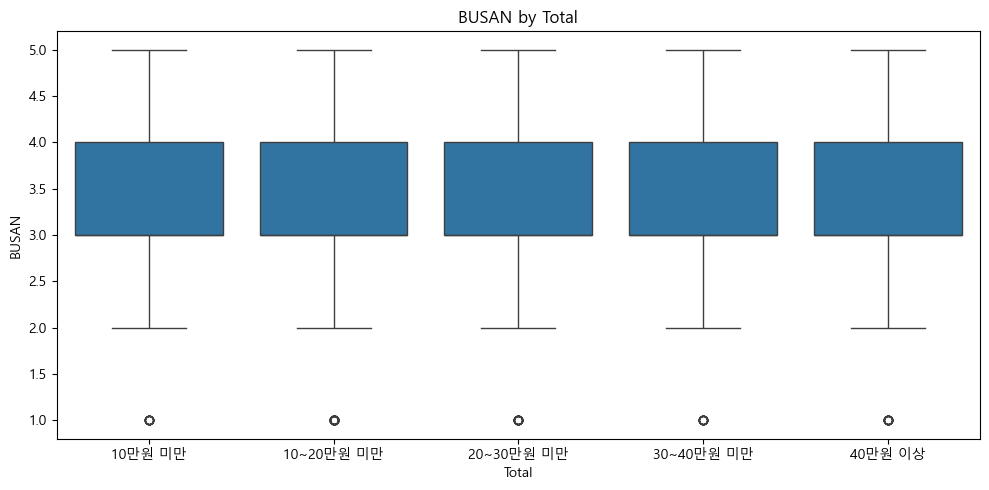


CHUNGNAM에 관한 그래프


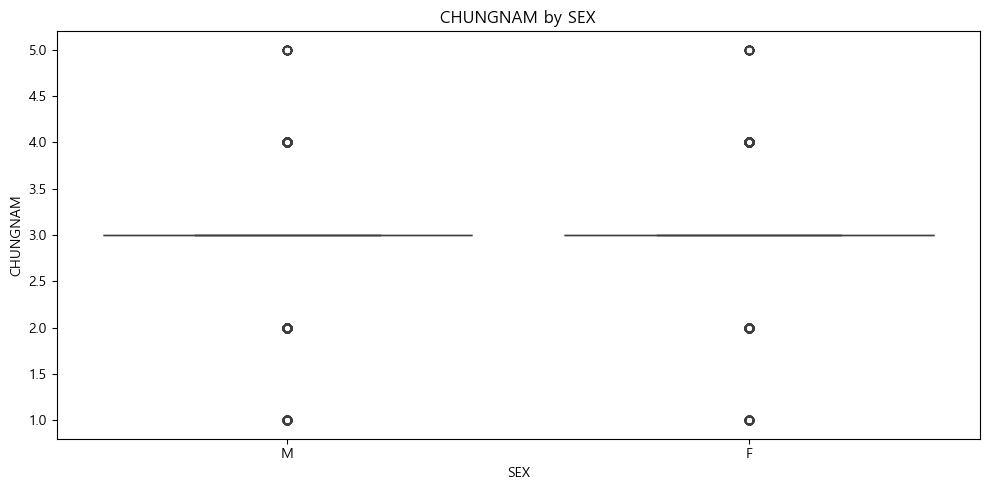


CHUNGNAM에 관한 그래프


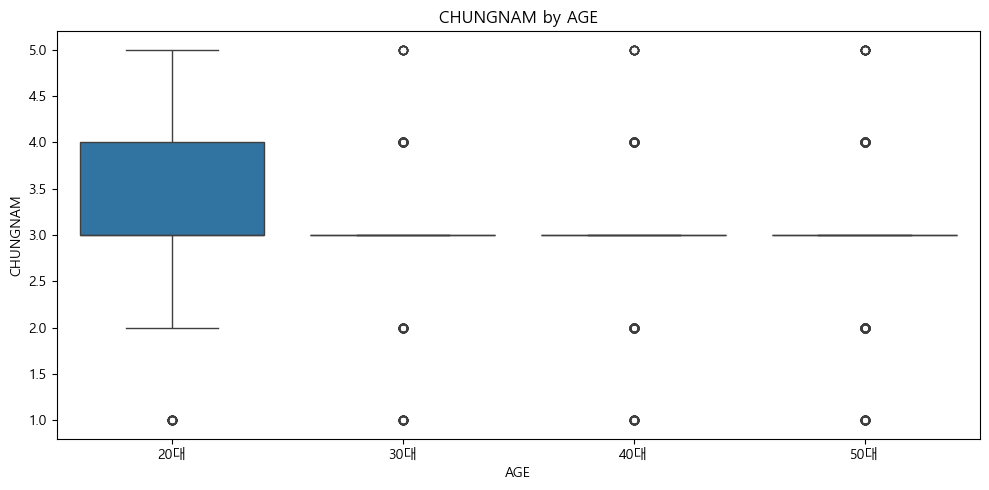


CHUNGNAM에 관한 그래프


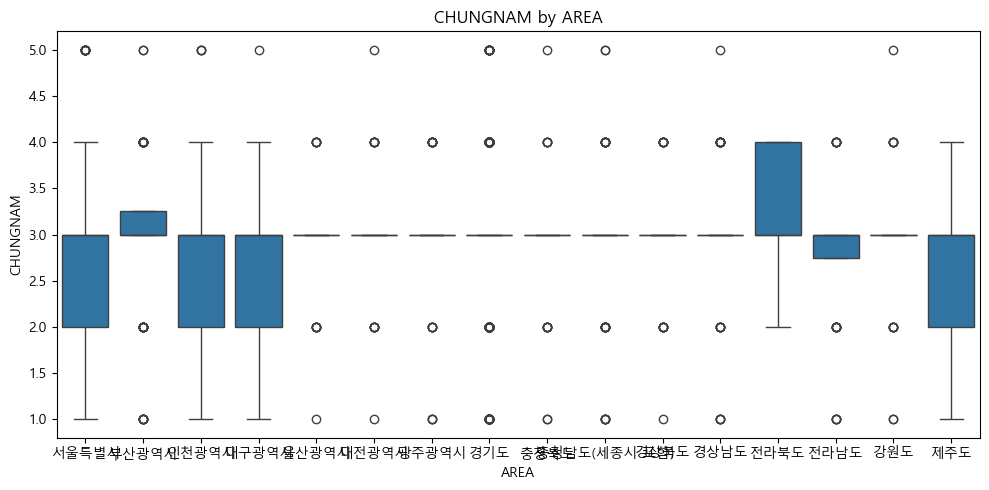


CHUNGNAM에 관한 그래프


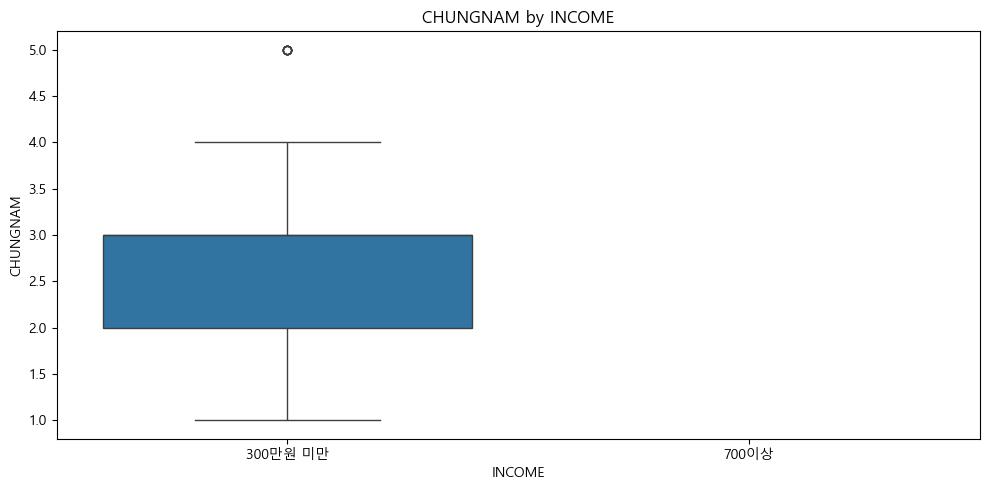


CHUNGNAM에 관한 그래프


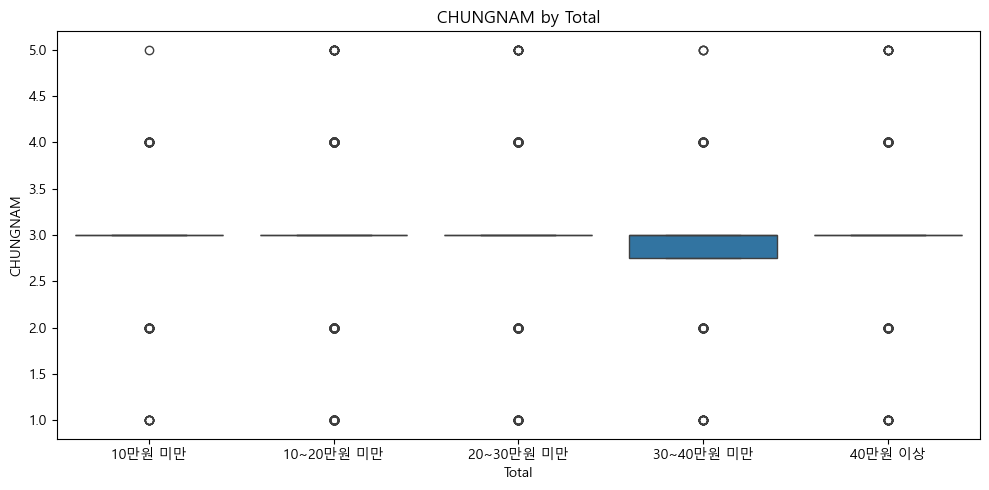


CHUNGBUK에 관한 그래프


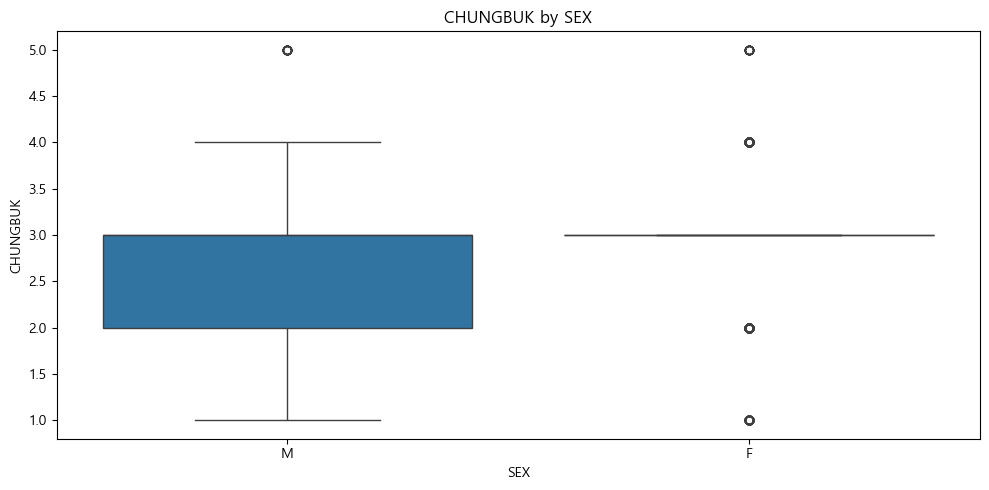


CHUNGBUK에 관한 그래프


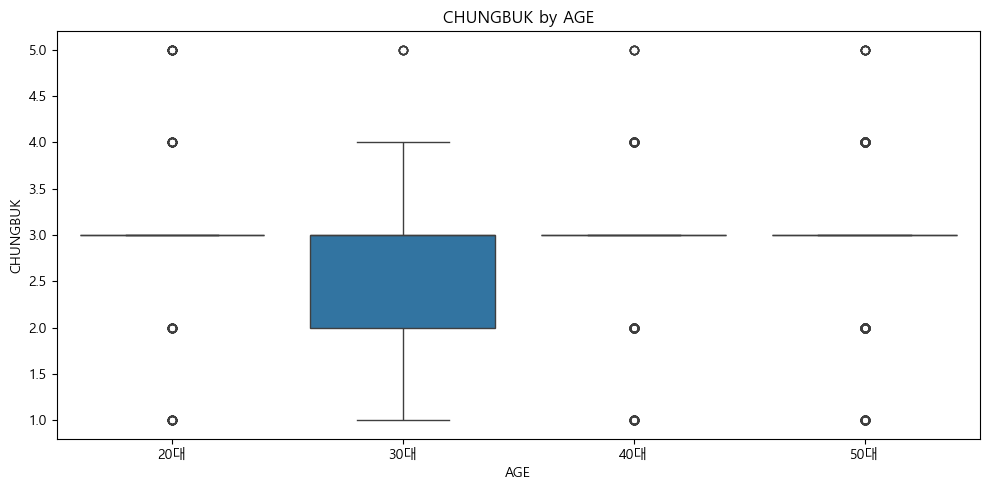


CHUNGBUK에 관한 그래프


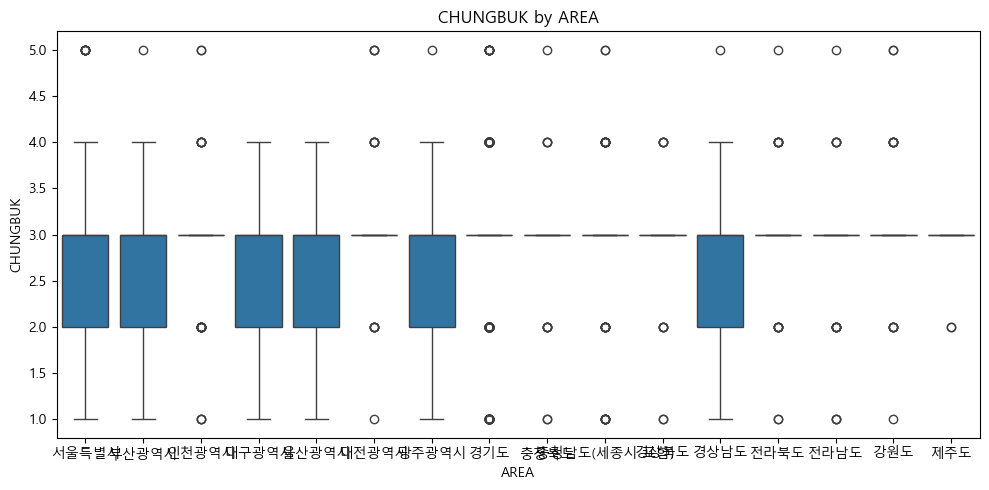


CHUNGBUK에 관한 그래프


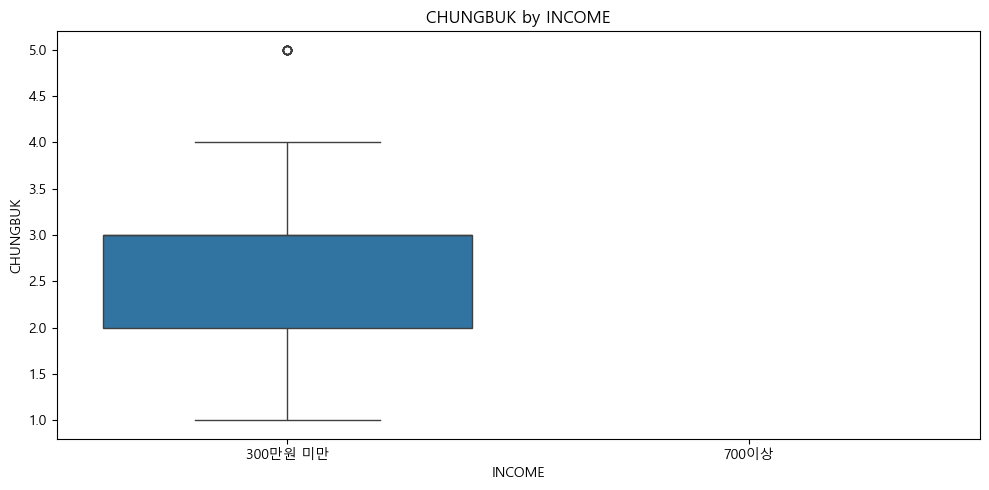


CHUNGBUK에 관한 그래프


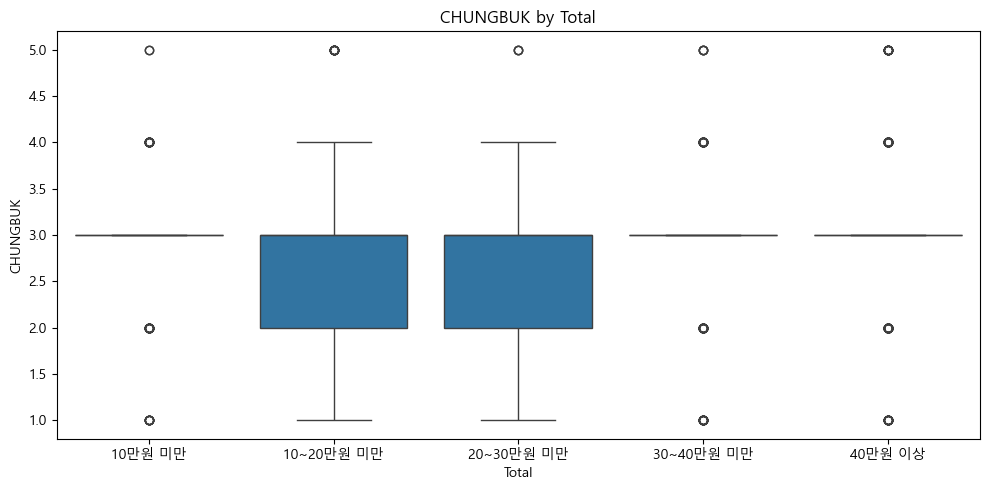


GYEONGNAM에 관한 그래프


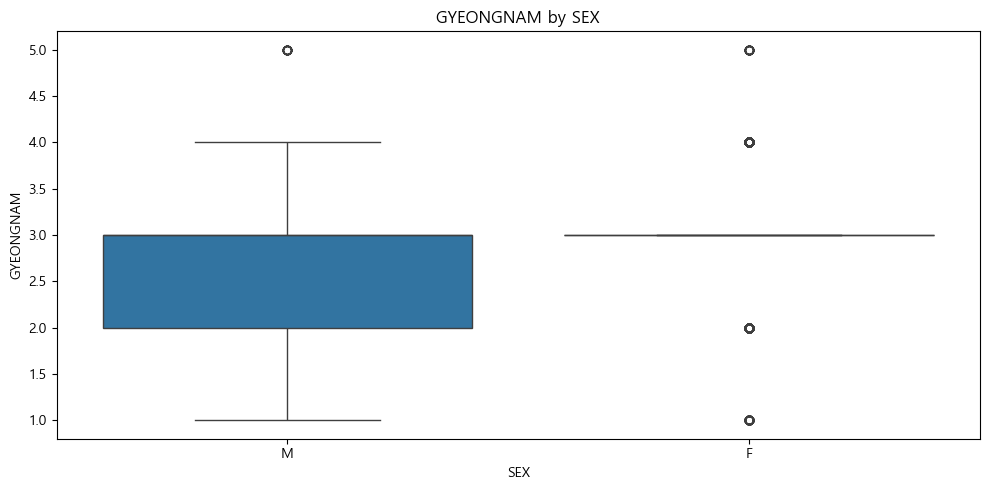


GYEONGNAM에 관한 그래프


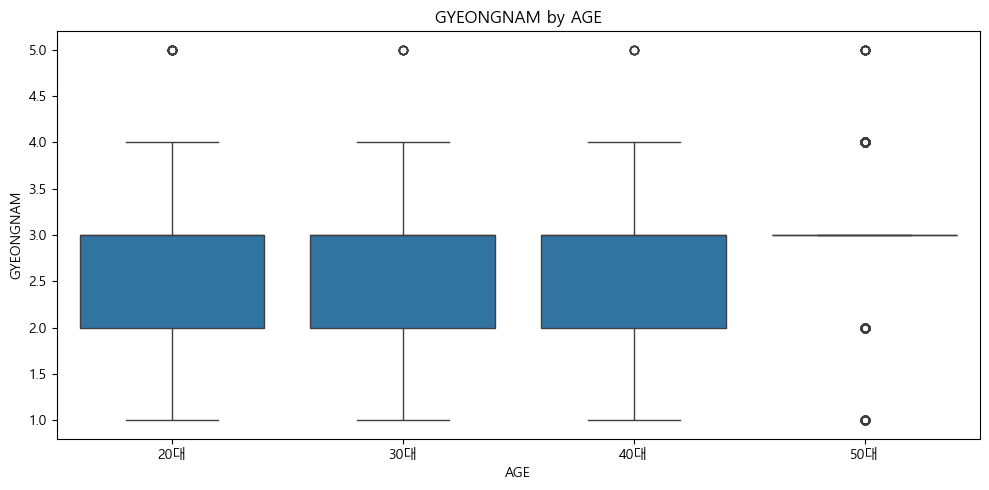


GYEONGNAM에 관한 그래프


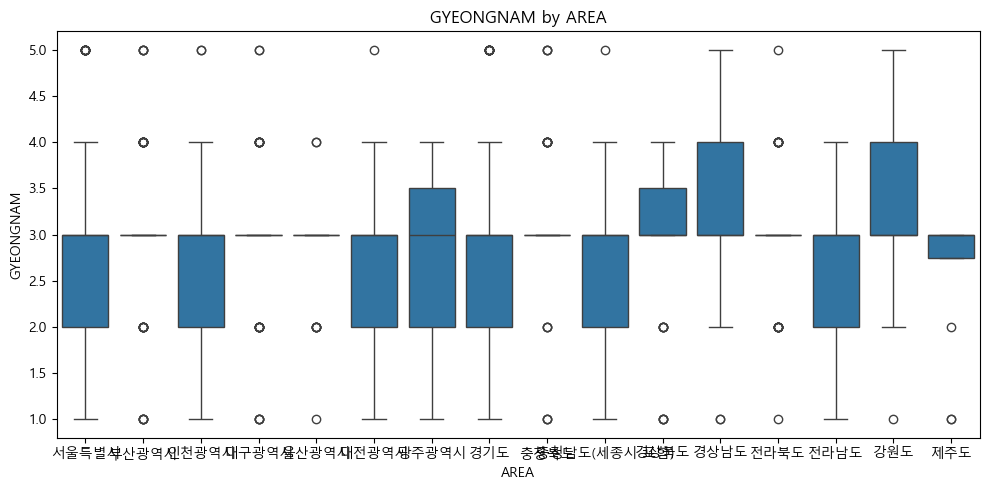


GYEONGNAM에 관한 그래프


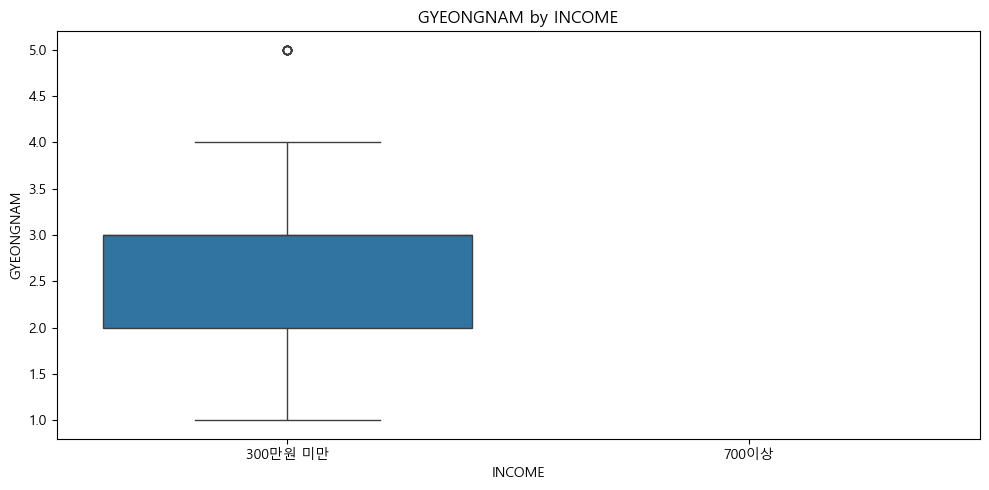


GYEONGNAM에 관한 그래프


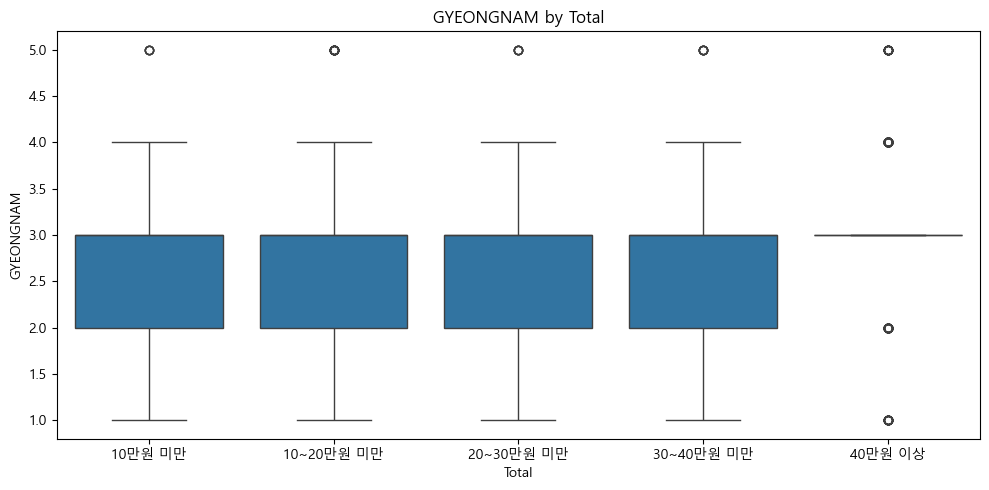


GYEONGBUK에 관한 그래프


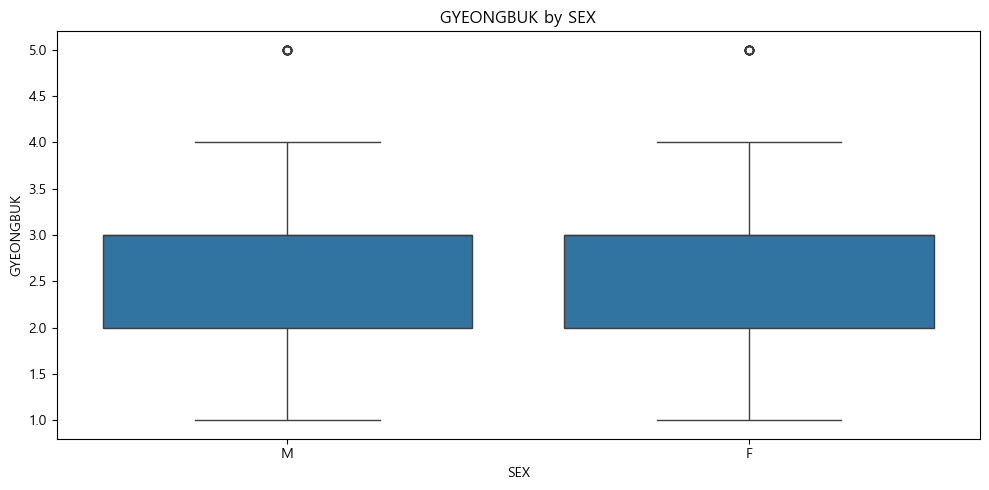


GYEONGBUK에 관한 그래프


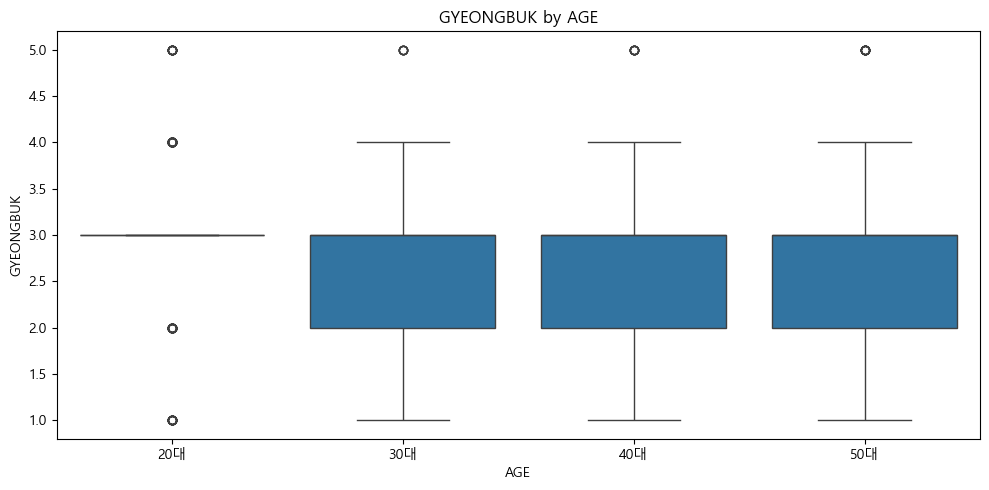


GYEONGBUK에 관한 그래프


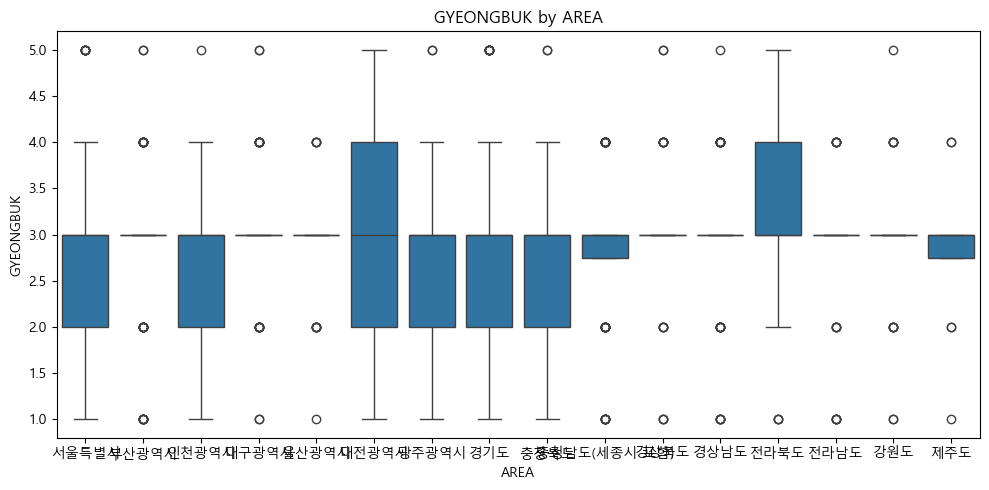


GYEONGBUK에 관한 그래프


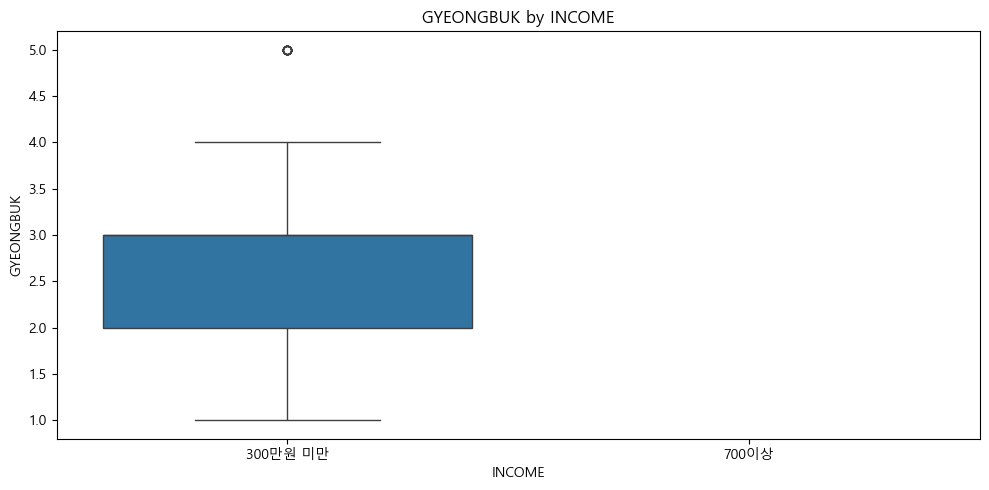


GYEONGBUK에 관한 그래프


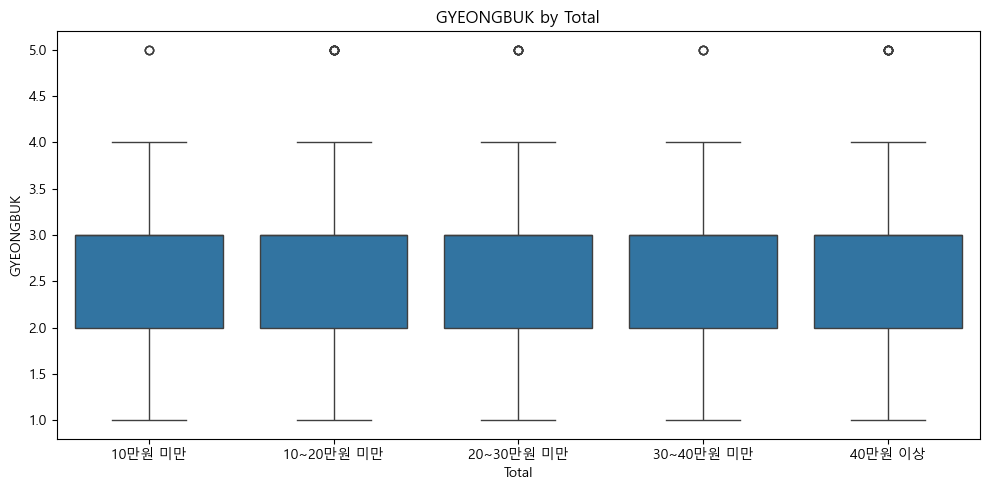


JEONNAM에 관한 그래프


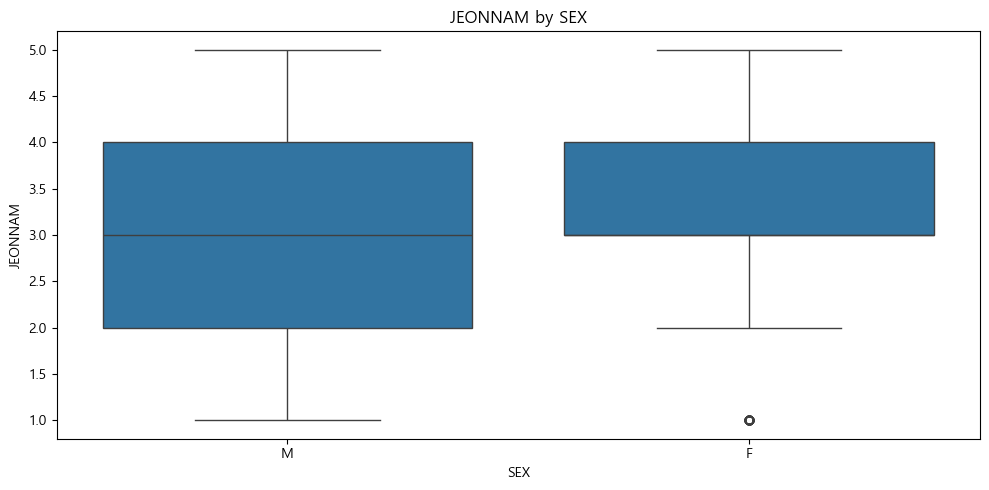


JEONNAM에 관한 그래프


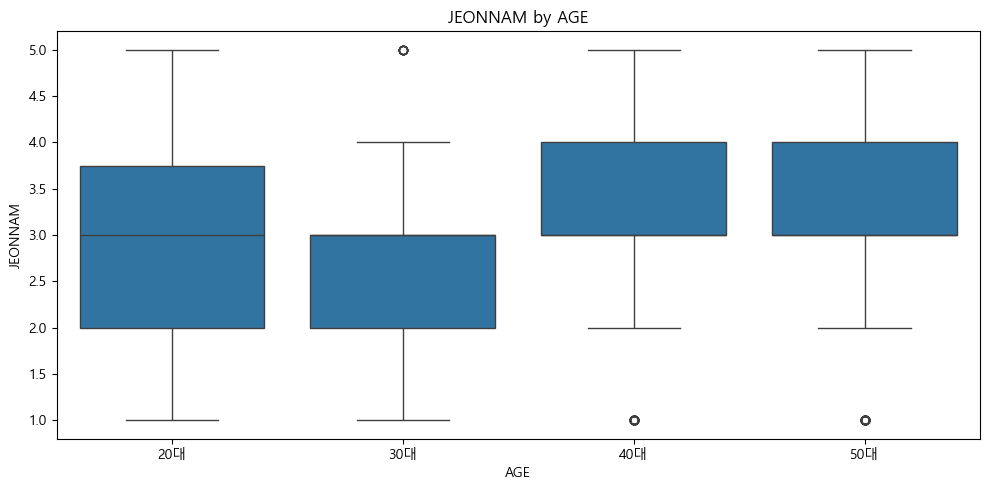


JEONNAM에 관한 그래프


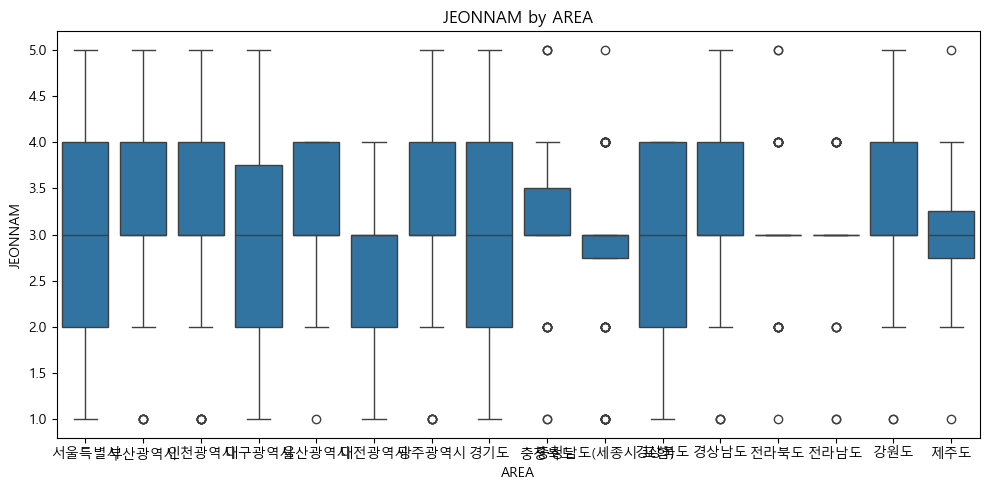


JEONNAM에 관한 그래프


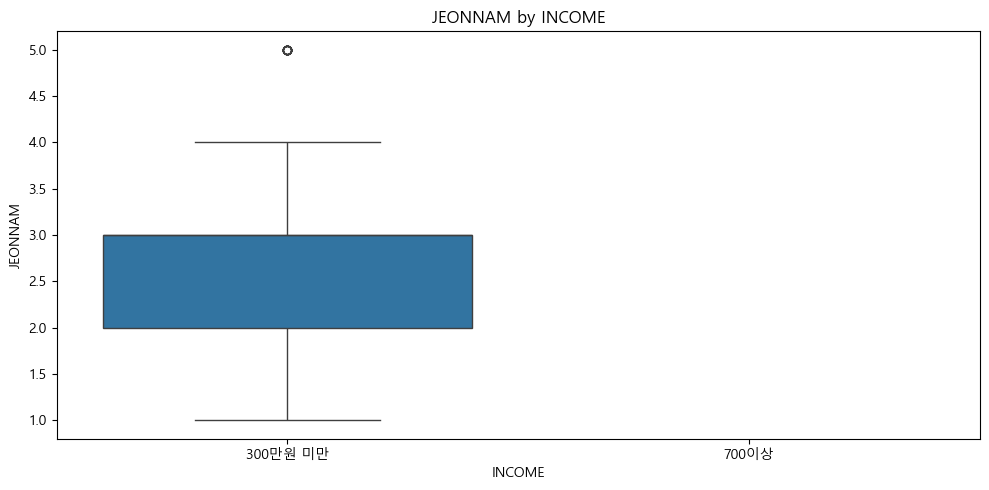


JEONNAM에 관한 그래프


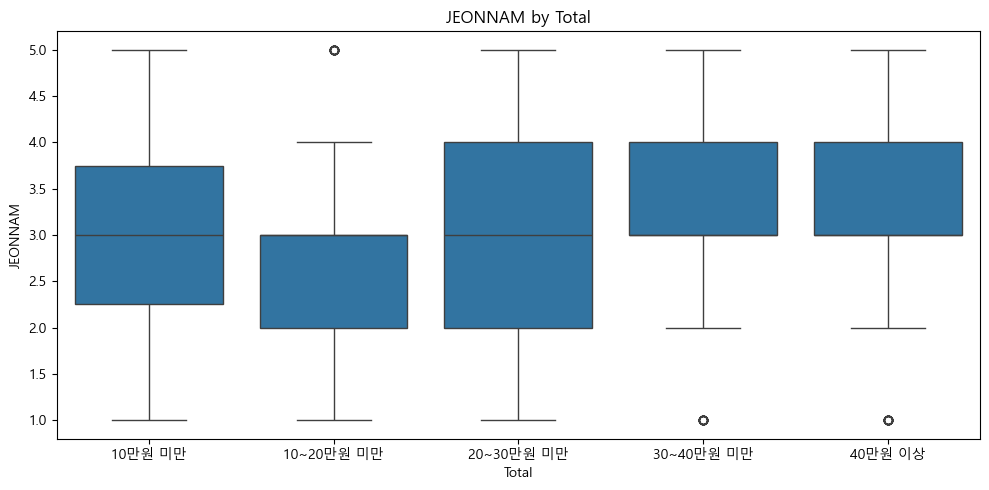


JEONBUK에 관한 그래프


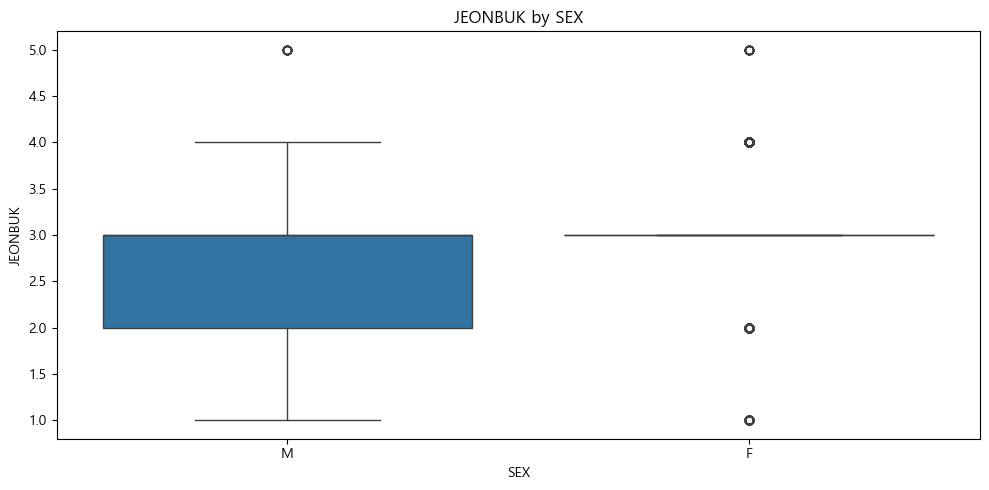


JEONBUK에 관한 그래프


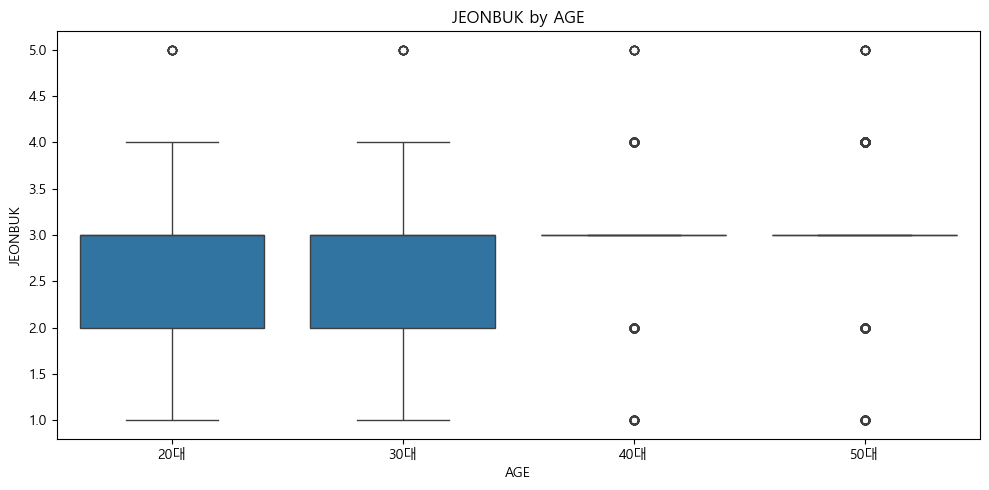


JEONBUK에 관한 그래프


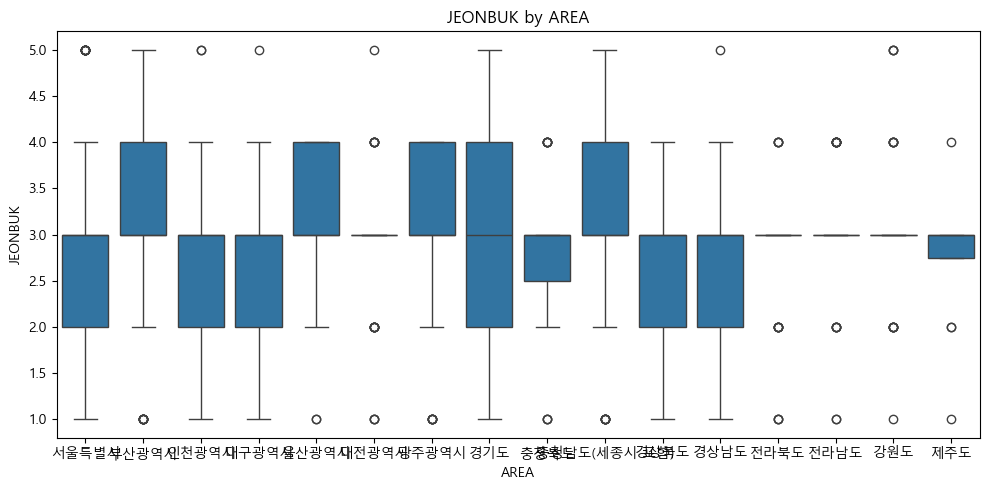


JEONBUK에 관한 그래프


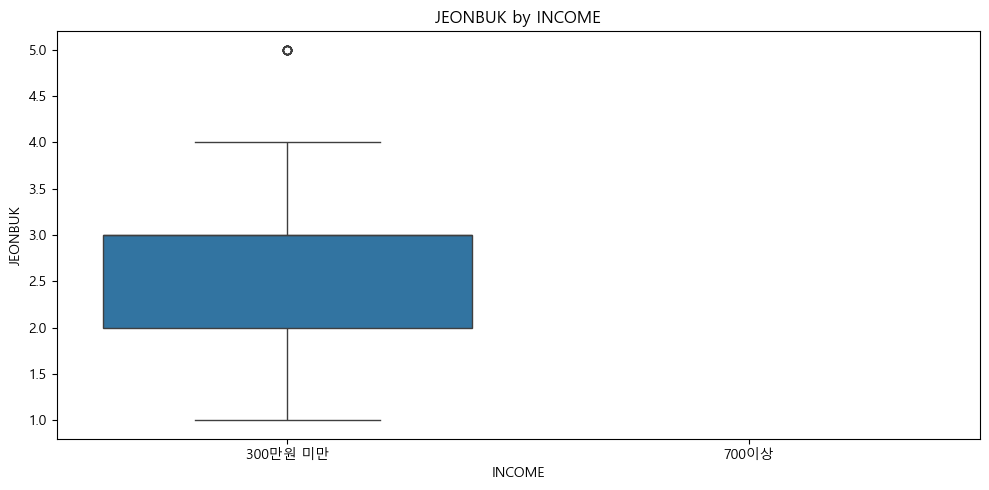


JEONBUK에 관한 그래프


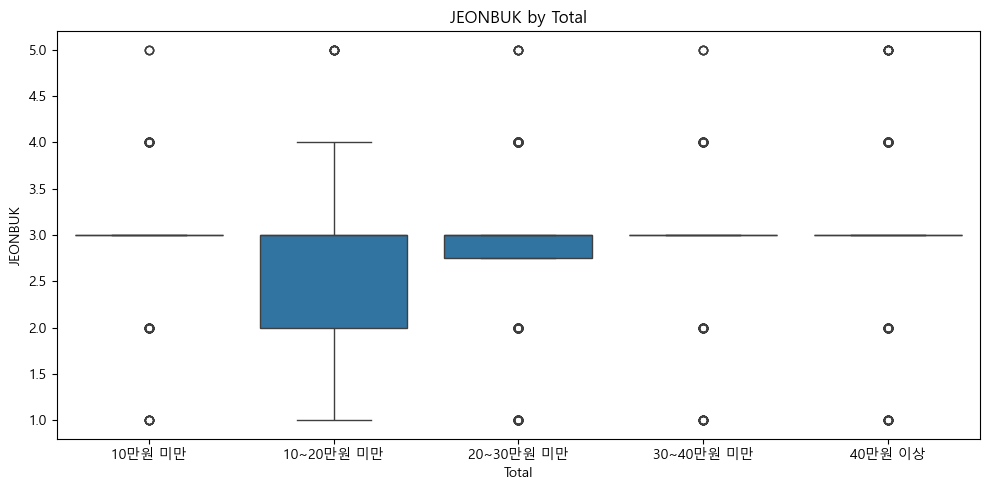


GANGWAN에 관한 그래프


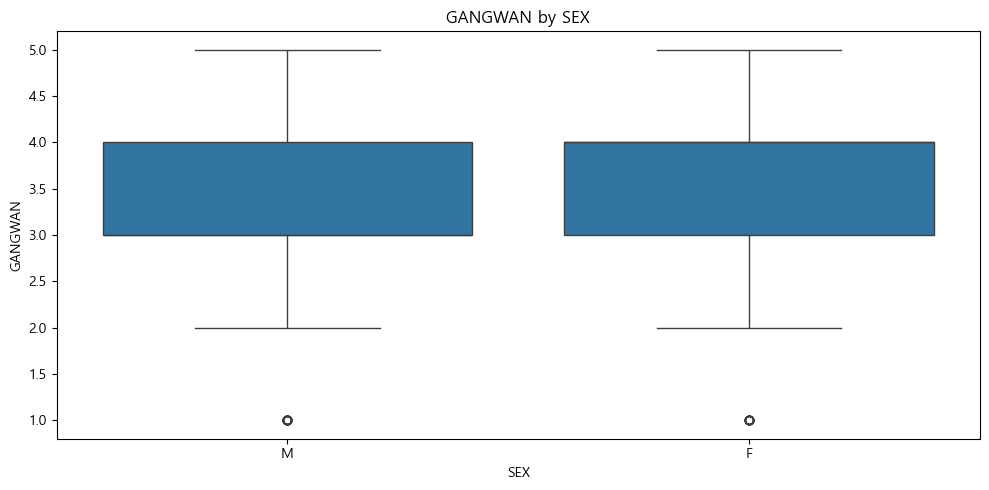


GANGWAN에 관한 그래프


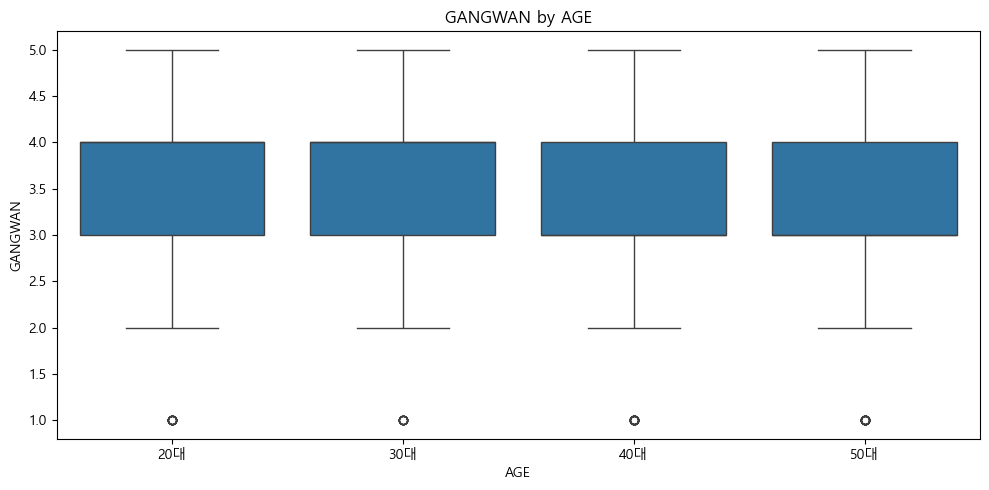


GANGWAN에 관한 그래프


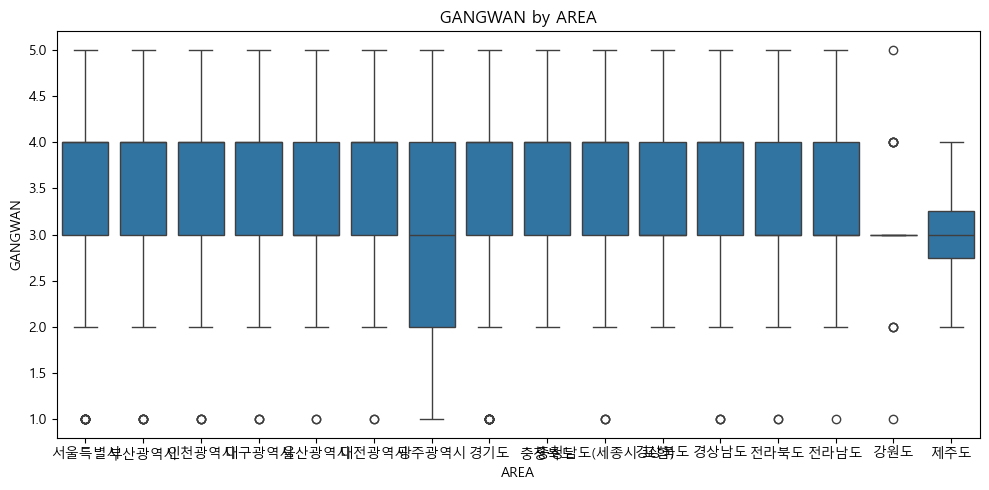


GANGWAN에 관한 그래프


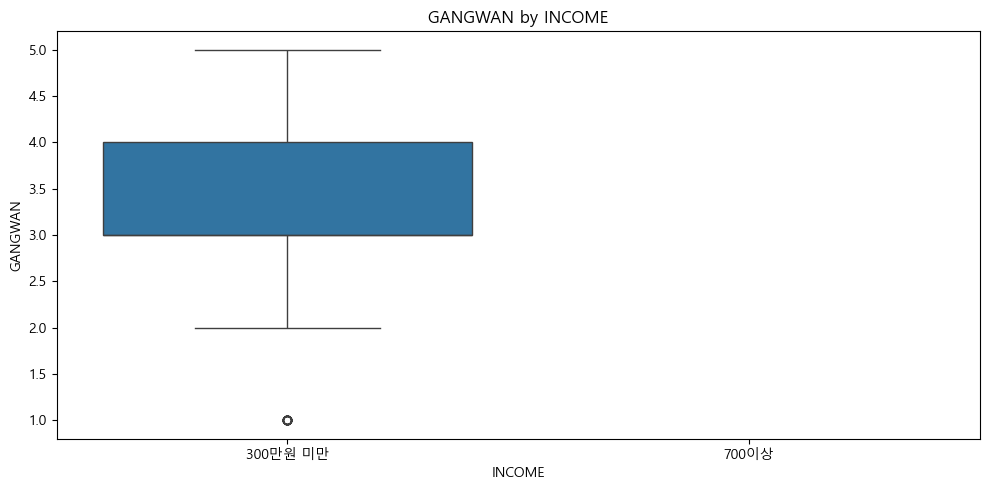


GANGWAN에 관한 그래프


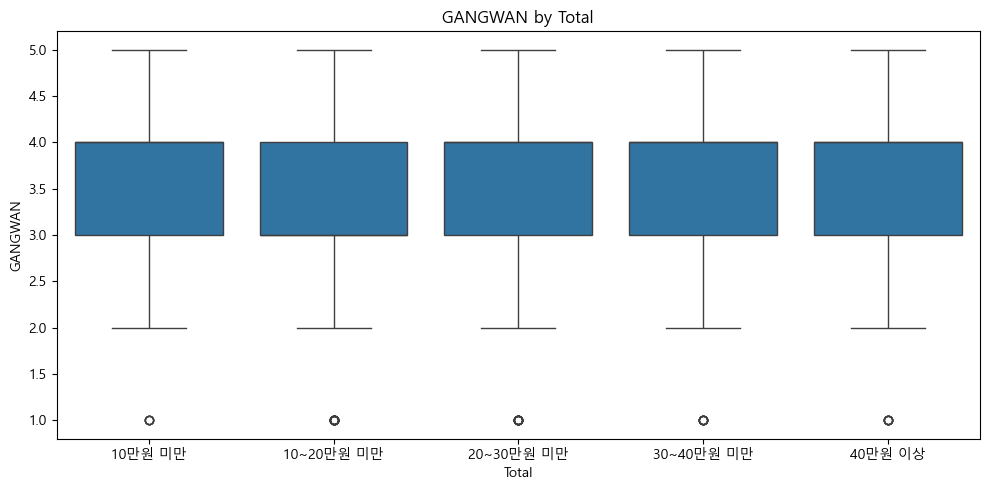


JEJU에 관한 그래프


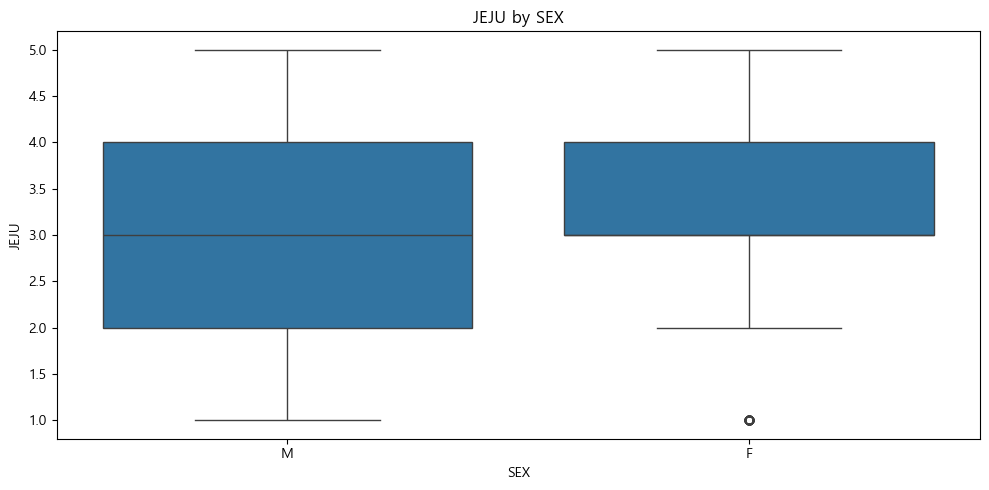


JEJU에 관한 그래프


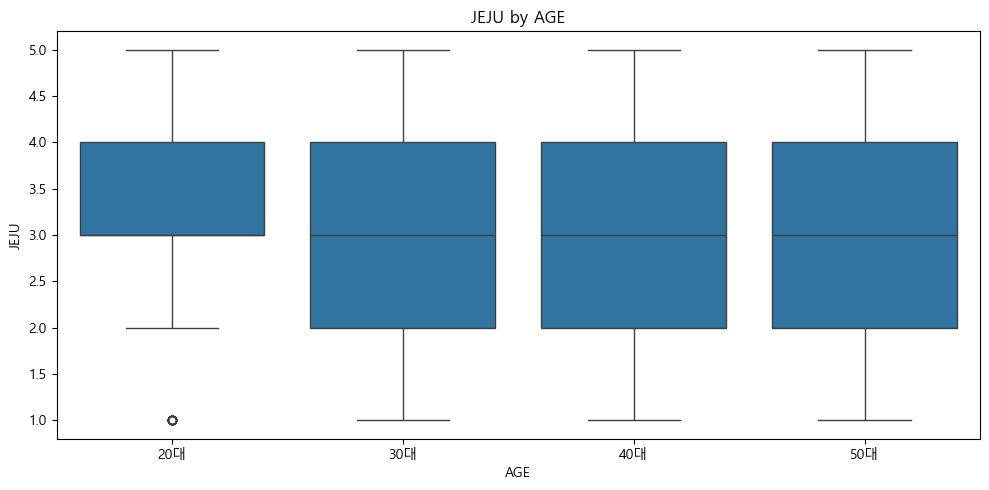


JEJU에 관한 그래프


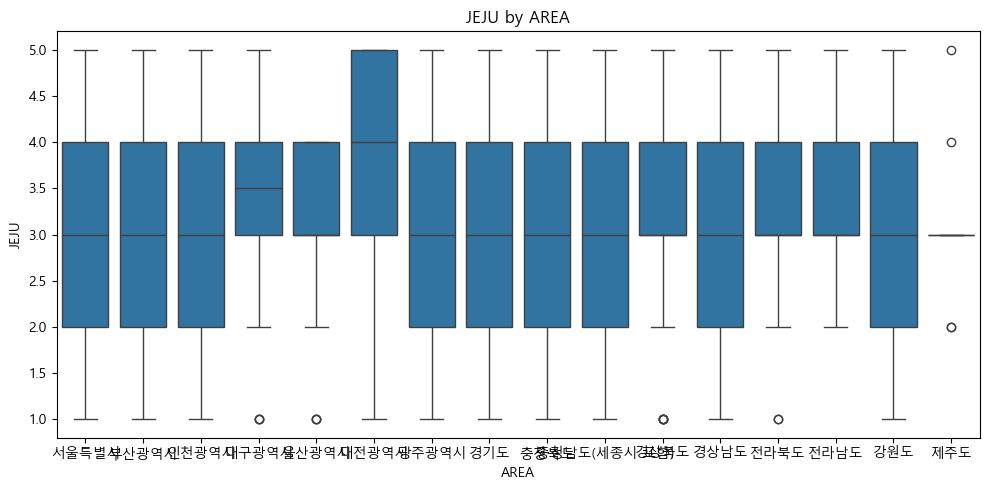


JEJU에 관한 그래프


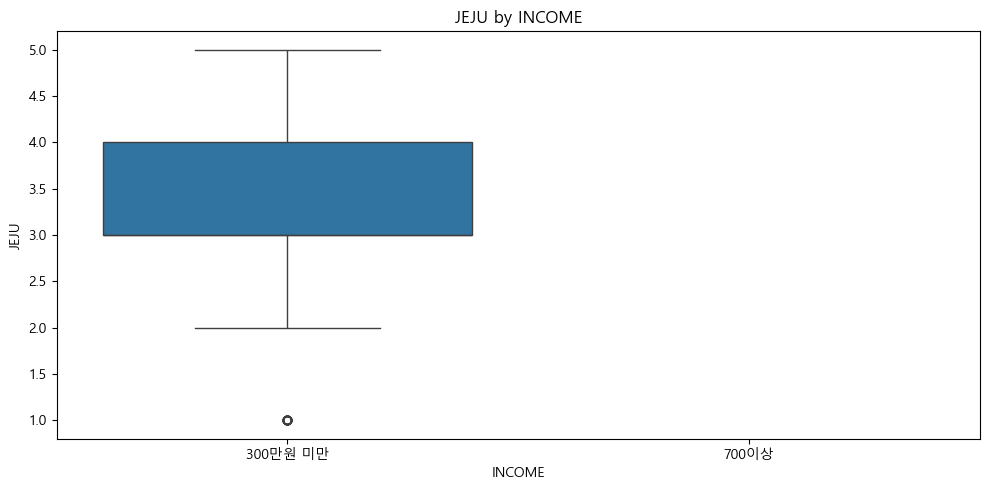


JEJU에 관한 그래프


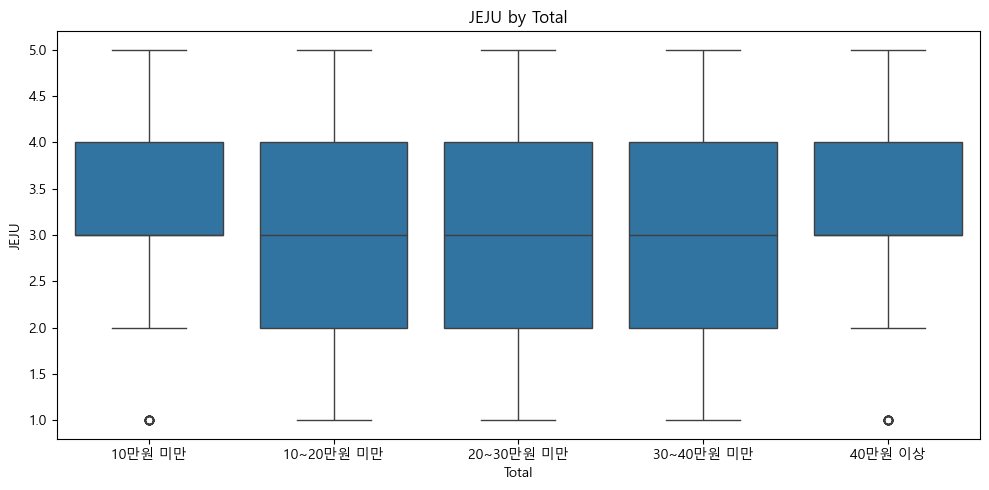

In [17]:
# 데이터 시각화
location = [ 'SEOUL', 'GYEONGGI', 'BUSAN', 'CHUNGNAM', 'CHUNGBUK', 'GYEONGNAM', 'GYEONGBUK', 'JEONNAM', 'JEONBUK', 'GANGWAN', 'JEJU']
for j in location:
    for i in ['SEX', 'AGE', 'AREA', 'INCOME','Total']:
        print(f'{j}에 관한 그래프')
        plt.figure(figsize=(10, 5))
        if i == 'SEX':
            order_list =['M','F']
        elif i == 'AGE':
            order_list = ['20대', '30대', '40대', '50대']
        elif i == 'AREA':
            order_list = ['서울특별시', '부산광역시','인천광역시', '대구광역시', '울산광역시','대전광역시','광주광역시', '경기도', '충청북도', '충청남도(세종시 포함)',
                        '경상북도', '경상남도',  '전라북도', '전라남도', '강원도', '제주도']
        elif i == 'INCOME':
            order_list = ['300만원 미만','700이상']
        elif i == 'Total':
            order_list = ['10만원 미만','10~20만원 미만','20~30만원 미만','30~40만원 미만','40만원 이상']
        sns.boxplot(x=i, y=f'{j}', data=combined_df[['SEX', 'AGE', 'AREA', 'INCOME','Total', f'{j}']], order = order_list)
        plt.title(f'{j} by {i}')
        plt.tight_layout()
        plt.show()
        print()


# Statistical hyponesis testing

##### 성별에 따른 기대치 차이에 차에 대한 t-test

In [18]:
female = grouped_sex1[['SEOUL', 'GYEONGGI', 'BUSAN', 'CHUNGNAM', 'CHUNGBUK', 'CHUNGNAM', 'GYEONGBUK', 'JEONNAM', 'JEONBUK', 'GANGWAN', 'JEJU']]
male = grouped_sex2[['SEOUL', 'GYEONGGI', 'BUSAN', 'CHUNGNAM', 'CHUNGBUK', 'CHUNGNAM', 'GYEONGBUK', 'JEONNAM', 'JEONBUK', 'GANGWAN', 'JEJU']]

# 독립 표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(female, male)

# 결과 출력
print("t-통계량:", t_stat)
print("p-value:", p_value)

# p-value에 따라 결론 도출
for value in p_value:
    alpha = 0.05
    if value < alpha:
        print("귀무가설을 기각합니다. 성별 간 평균 차이가 존재합니다.")
    else:
        print("귀무가설을 채택합니다. 성별 간 평균 차이가 없습니다.")

t-통계량: [1.78401126 2.36652971 2.41678943 1.97847317 0.78059107 1.97847317
 3.10819339 0.58503493 1.51881638 1.91379121 4.92566465]
p-value: [7.46147933e-02 1.80764442e-02 1.57713837e-02 4.80497847e-02
 4.35160643e-01 4.80497847e-02 1.91610291e-03 5.58608247e-01
 1.29009932e-01 5.58283833e-02 9.29408674e-07]
귀무가설을 채택합니다. 성별 간 평균 차이가 없습니다.
귀무가설을 기각합니다. 성별 간 평균 차이가 존재합니다.
귀무가설을 기각합니다. 성별 간 평균 차이가 존재합니다.
귀무가설을 기각합니다. 성별 간 평균 차이가 존재합니다.
귀무가설을 채택합니다. 성별 간 평균 차이가 없습니다.
귀무가설을 기각합니다. 성별 간 평균 차이가 존재합니다.
귀무가설을 기각합니다. 성별 간 평균 차이가 존재합니다.
귀무가설을 채택합니다. 성별 간 평균 차이가 없습니다.
귀무가설을 채택합니다. 성별 간 평균 차이가 없습니다.
귀무가설을 채택합니다. 성별 간 평균 차이가 없습니다.
귀무가설을 기각합니다. 성별 간 평균 차이가 존재합니다.


In [27]:
# MANOVA 수행
manova = MANOVA.from_formula('SEOUL+GYEONGGI+BUSAN+CHUNGNAM+CHUNGBUK+CHUNGNAM+GYEONGBUK+JEONNAM+JEONBUK+GANGWAN+JEJU ~ SEX', data=combined_df)
results = manova.mv_test()

print(results)

                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF   Den DF   F Value  Pr > F
------------------------------------------------------------------
          Wilks' lambda  0.0523 10.0000 1562.0000 2828.1728 0.0000
         Pillai's trace  0.9477 10.0000 1562.0000 2828.1728 0.0000
 Hotelling-Lawley trace 18.1061 10.0000 1562.0000 2828.1728 0.0000
    Roy's greatest root 18.1061 10.0000 1562.0000 2828.1728 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
             SEX           Value   Num DF   Den DF  F Value Pr > F
------------------------------------------------------------------
             Wilks' lambda 0.9791 10.0000 1562.0000  3.3326 0.0003
            Pill

##### 소득에 따른 기대치 차이에 대한 MANOVA 분석

In [21]:
# MANOVA 수행
manova = MANOVA.from_formula('SEOUL+GYEONGGI+BUSAN+CHUNGNAM+CHUNGBUK+CHUNGNAM+GYEONGBUK+JEONNAM+JEONBUK+GANGWAN+JEJU ~ INCOME', data=combined_df)
results = manova.mv_test()

print(results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
       Intercept        Value   Num DF   Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.1251 10.0000 1562.0000 1092.7798 0.0000
         Pillai's trace 0.8749 10.0000 1562.0000 1092.7798 0.0000
 Hotelling-Lawley trace 6.9960 10.0000 1562.0000 1092.7798 0.0000
    Roy's greatest root 6.9960 10.0000 1562.0000 1092.7798 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
           INCOME         Value   Num DF   Den DF  F Value Pr > F
-----------------------------------------------------------------
            Wilks' lambda 0.9728 10.0000 1562.0000  4.3683 0.0000
           Pillai's trace 0.02

##### 나이에 따른 기대치 차이에 대한 MNOVA 분석

In [22]:
# MANOVA 수행
manova = MANOVA.from_formula('SEOUL+GYEONGGI+BUSAN+CHUNGNAM+CHUNGBUK+CHUNGNAM+GYEONGBUK+JEONNAM+JEONBUK+GANGWAN+JEJU ~ AGE', data=combined_df)
results = manova.mv_test()

print(results)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value   Num DF   Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1633 10.0000 1560.0000 799.1952 0.0000
         Pillai's trace 0.8367 10.0000 1560.0000 799.1952 0.0000
 Hotelling-Lawley trace 5.1230 10.0000 1560.0000 799.1952 0.0000
    Roy's greatest root 5.1230 10.0000 1560.0000 799.1952 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
           AGE           Value   Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9336 30.0000 4579.5842  3.6170 0.0000
          Pillai's trace 0.0677 30.0000 4686.

##### 지역에 따른 기대치 차이에 대한 MANOVA

In [23]:
# MANOVA 수행
manova = MANOVA.from_formula('SEOUL+GYEONGGI+BUSAN+CHUNGNAM+CHUNGBUK+CHUNGNAM+GYEONGBUK+JEONNAM+JEONBUK+GANGWAN+JEJU ~ AREA', data=combined_df)
results = manova.mv_test()

print(results)

                    Multivariate linear model
                                                                 
-----------------------------------------------------------------
        Intercept        Value   Num DF   Den DF  F Value  Pr > F
-----------------------------------------------------------------
           Wilks' lambda 0.5661 10.0000 1548.0000 118.6470 0.0000
          Pillai's trace 0.4339 10.0000 1548.0000 118.6470 0.0000
  Hotelling-Lawley trace 0.7665 10.0000 1548.0000 118.6470 0.0000
     Roy's greatest root 0.7665 10.0000 1548.0000 118.6470 0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
          AREA          Value   Num DF    Den DF   F Value Pr > F
-----------------------------------------------------------------
          Wilks' lambda 0.8203 150.0000 12997.4504  2.0712 0.0000
         Pillai's trace 0.1924